In [2]:
import tensorflow as tf

print("GPU Available:", tf.config.list_physical_devices('GPU'))


ValueError: Name tf.RaggedTensorSpec has already been registered for class tensorflow.python.ops.ragged.ragged_tensor.RaggedTensorSpec.

In [ ]:
# Set TensorFlow to use GPU
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)  # Prevents memory overflow
        print("GPU is enabled and set for use")
    except RuntimeError as e:
        print(e)


In [3]:
!pip install kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kanimozhinatarajan","key":"16cf5d68d375d21e007839edb58d27b0"}'}

In [5]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
!kaggle datasets download -d raddar/chest-xrays-indiana-university --unzip

Dataset URL: https://www.kaggle.com/datasets/raddar/chest-xrays-indiana-university
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
User cancelled operation


In [7]:
!kaggle datasets download -d sinamhd9/chexnet-weights --unzip

Dataset URL: https://www.kaggle.com/datasets/sinamhd9/chexnet-weights
License(s): unknown


In [8]:
!kaggle datasets download -d shreyashgaur/glove-6b-300d-txt --unzip

Dataset URL: https://www.kaggle.com/datasets/shreyashgaur/glove-6b-300d-txt
License(s): CC0-1.0


In [9]:
!rm -rf sample_data

In [10]:
import pandas as pd

reports = pd.read_csv('/content/indiana_reports.csv')
projections = pd.read_csv('/content/indiana_projections.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/indiana_reports.csv'

In [ ]:
reports.head()

In [ ]:
projections.head()

In [ ]:
df = pd.merge(projections, reports, on='uid')
df.head()

In [ ]:
import cv2
import matplotlib.pyplot as plt

img_path = '/content/images/images_normalized/1000_IM-0003-1001.dcm.png'

image = cv2.imread(img_path)

plt.imshow(image)
plt.show()
print("UID: ",df[df['filename'] == '1000_IM-0003-1001.dcm.png']['uid'])
print("Findings: ",df[df['filename'] == '1000_IM-0003-1001.dcm.png']['findings'])
print("Impression: ",df[df['filename'] == '1000_IM-0003-1001.dcm.png']['impression'])
print("Indication: ",df[df['filename'] == '1000_IM-0003-1001.dcm.png']['indication'])

In [ ]:
no_find = sum(df['findings'].isnull())
no_find

In [ ]:
findings= list(df["findings"])
impressions = list(df['impression'])
len_df = len(findings)
for i in range(len_df):
  df.findings.fillna(df.impression.iloc[i],inplace=True)



In [ ]:
no_find_new = sum(df['findings'].isnull())
no_find_new

In [ ]:
df.head()

In [ ]:
import tqdm

cols = ['Problems','MeSH','image','indication','comparison','findings','impression','projection']
for i in range(len_df):
  for j in cols:
    df.replace(to_replace = df[j].iloc[i], value = df[j].iloc[i].lower(), inplace = True)

df.head()

In [ ]:
df.head()

In [ ]:
df.uid.value_counts()

In [ ]:
count = dict (df.uid.value_counts())
count

In [ ]:
uid_dict = df.groupby("uid")["filename"].apply(list).to_dict()

uid_dict

In [ ]:
for i in uid_dict.keys():
  print(i,end = " ")

In [ ]:
uid = list(uid_dict.keys())
uid

In [ ]:
import random



image1 = []
image2 = []
report = []

filename = []

for i in uid:
    inlen = len(uid_dict[i])

    # Handle cases where inlen is 0 or greater than 5
    if inlen == 0:
        print(f"Warning: UID {i} has no associated images.")
        continue
    if inlen > 5:
        print(f"Warning: UID {i} has more than 5 images.")



    # Assign image pairs based on number of available images
    if inlen == 1:
        image1.append(uid_dict[i][0])
        image2.append(uid_dict[i][0])
    elif inlen == 2:
        image1.append(uid_dict[i][0])
        image2.append(uid_dict[i][1])
    elif inlen == 3:
        a = random.choice([0, 1])
        b = 1 if a == 0 else 2
        image1.append(uid_dict[i][a])
        image2.append(uid_dict[i][b])
    elif inlen == 4:
        a = random.choice([0, 1])
        b = random.choice([2, 3])
        image1.append(uid_dict[i][a])
        image2.append(uid_dict[i][b])
    elif inlen == 5:
        a = random.choice([0, 1])
        b = random.choice([2, 3, 4])
        image1.append(uid_dict[i][a])
        image2.append(uid_dict[i][b])
    else:
        # If there are more than 5 images, choose randomly from the first 5
        a = random.randint(0, 4)
        b = random.randint(0, 4)
        while a == b:  # Ensure distinct images are chosen
            b = random.randint(0, 4)
        image1.append(uid_dict[i][a])
        image2.append(uid_dict[i][b])

# Ensure the index 3846 is within range before accessing
print(uid[3846])


In [ ]:
import regex as re
contractions = {
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "i had / i would",
"i'd've": "i would have",
"i'll": "i shall / I will",
"i'll've": "i shall have / i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

finding = list(df.findings)

for idx in range(len(finding)):
  list_of_words=finding[idx].split(" ")

  sentence=""
  for i in list_of_words:

    if len(i)>2:

      if i in list(contractions.keys()):
        wrd=contractions[i]
      else:
        wrd=i

      sentence+=wrd+" "
    else:
      continue
  finding[idx]=sentence


for idx in range(len(finding)):

  report=re.sub("[^a-z.]"," ",finding[idx])
  report=re.sub("xx+","",report)
  report=re.sub(r'\b\w{1,2}\b',"",report) #some unwanted words came up which are having lenbth<2. They are also removed
  report=re.sub("\s\s+"," ",report)
  finding[idx]=report
print("\n")


for i in range(len_df):
  df.replace(df.findings[i],finding[i])


df.head()


In [ ]:
uid_s = pd.Series(uid, name="uid")
image1_s = pd.Series(image1, name="image_1")
image2_s = pd.Series(image2, name="image_2")
report = pd.Series(list(df.findings),name='reports')
image_df = pd.DataFrame({"uid": uid_s,"image_1": image1_s, "image_2": image2_s})
rep_df = pd.DataFrame({"uid":df.uid, "reports":df.findings})


image_df.head()

In [ ]:
rep_df.head()

In [ ]:
full_df = image_df.merge(rep_df, on='uid')
full_df.drop_duplicates(inplace=True)

In [ ]:
full_df.head()

In [ ]:
full_df.iloc[3846]

In [ ]:
full_df.to_csv('final_data.csv')

## Encoder Decoder Model ##

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import sklearn
import tqdm
from tqdm import tqdm
import nltk
import warnings
warnings.filterwarnings("ignore")
import cv2
from sklearn.model_selection import train_test_split
import PIL
from PIL import Image
import time

import tensorflow as tf
import keras
from keras.layers import Input,Dense,Conv2D,concatenate,Dropout,LSTM
from keras import Model
from tensorflow.keras import activations
import warnings
warnings.filterwarnings("ignore")
import nltk.translate.bleu_score as bleu

In [ ]:
from tensorflow.keras.applications import DenseNet121

image_shape= (224,224,3)
image_input= Input(shape=(224,224,3))
base=DenseNet121(include_top=False,input_tensor=image_input,input_shape=image_shape,pooling="avg")
pred=Dense(14,"sigmoid")(base.output)

chexnet_model=Model(inputs=base.input,outputs=pred)
chexnet_model.load_weights("/content/brucechou1983_CheXNet_Keras_0.3.0_weights.h5")

chexnet_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_2          │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d_2[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_3          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_3[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,051,854 (26.90 MB)

 Trainable params: 6,968,206 (26.58 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [ ]:
!ls

brucechou1983_CheXNet_Keras_0.3.0_weights.h5  glove.6B.300d.txt
final_data.csv				      train_image_features.npy


In [ ]:
final_chexnet_model = Model(
    inputs=chexnet_model.inputs,
    outputs=chexnet_model.layers[-2].output,
    name="Chexnet_model"
)


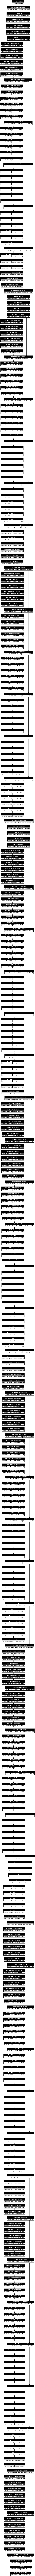

In [ ]:
tf.keras.utils.plot_model(
    final_chexnet_model,
    show_shapes=True,
    show_layer_names=True,
    to_file="chex.png"
)


In [ ]:
image_1= Input(shape=(224,224,3),name="image_1_features")
image_2= Input(shape=(224,224,3),name="image_2_features")
image_1_out=final_chexnet_model(image_1)
image_2_out=final_chexnet_model(image_2)
conc=concatenate((image_1_out,image_2_out),axis=-1,name="final_image_features")
feature_extraction_model=Model(inputs=[image_1,image_2],outputs=conc)
feature_extraction_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_1_features          │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ image_2_features          │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Chexnet_model             │ (None, 1024)           │      7,037,504 │ image_1_features[0][0… │
│ (Functional)              │                        │                │ image_2_features[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ final_image_features      │ (None, 2048)           │              0 │ Chexnet_model[0][0],   │
│ (Concatenate)             │                        │                │ Chexnet_model[1][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 6,953,856 (26.53 MB)

 Non-trainable params: 83,648 (326.75 KB)

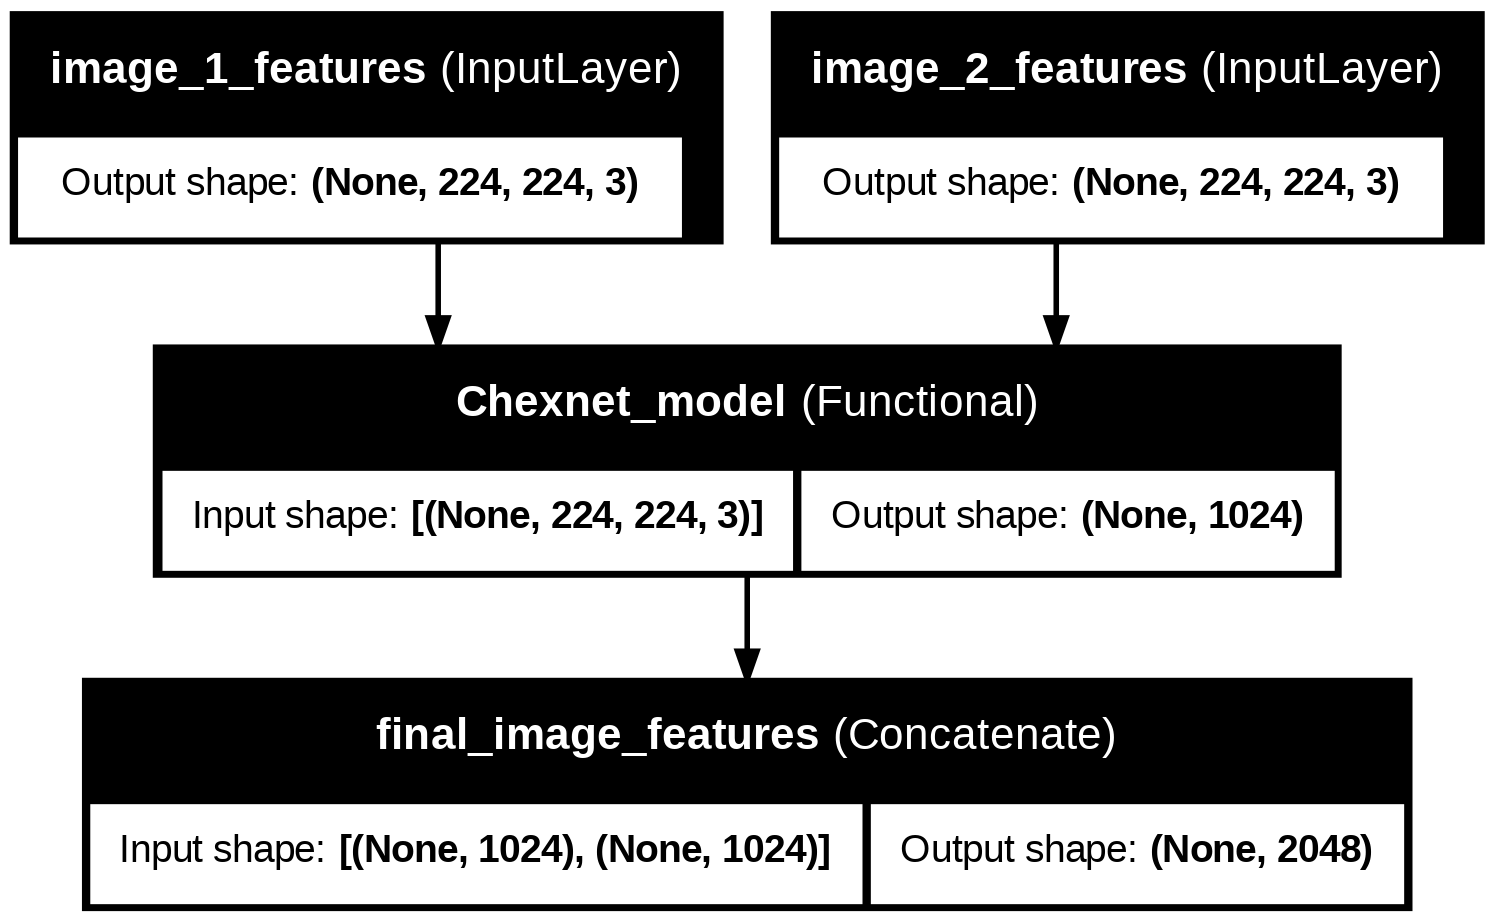

In [ ]:
tf.keras.utils.plot_model(feature_extraction_model,show_shapes=True,show_layer_names=True)

In [ ]:
model_df = pd.read_csv('final_data.csv')
model_df.head()

,Unnamed: 0,uid,image_1,image_2,reports
0,0,1,1_IM-0001-4001.dcm.png,1_IM-0001-3001.dcm.png,the cardiac silhouette and mediastinum size ar...
1,2,2,2_IM-0652-1001.dcm.png,2_IM-0652-2001.dcm.png,borderline cardiomegaly. midline sternotomy xx...
2,4,3,3_IM-1384-1001.dcm.png,3_IM-1384-2001.dcm.png,normal chest x-xxxx.
3,6,4,4_IM-2050-1001.dcm.png,4_IM-2050-2001.dcm.png,There are diffuse bilateral interstitial and a...
4,8,5,5_IM-2117-1003002.dcm.png,5_IM-2117-1004003.dcm.png,The cardiomediastinal silhouette and pulmonary...


In [ ]:
train, test = train_test_split(model_df,test_size=0.2,random_state=42,shuffle=True)
print(train.shape)
print(test.shape)

(3080, 5)
(771, 5)


In [ ]:
def image_feature_extraction(image1,image2):


  image_1 = Image.open('/content/images/images_normalized/'+str(image1))

  image_1= np.asarray(image_1.convert("RGB"))


  image_2=Image.open('/content/images/images_normalized/'+str(image2))
  image_2 = np.asarray(image_2.convert("RGB"))

  image_1=image_1/255
  image_2=image_2/255


  image_1 = cv2.resize(image_1,(224,224))
  image_2 = cv2.resize(image_2,(224,224))

  image_1= np.expand_dims(image_1, axis=0)
  image_2= np.expand_dims(image_2, axis=0)



  image_feature=feature_extraction_model([image_1,image_2])

  return image_feature

In [ ]:
train_features=[]
test_features=[]
for row in tqdm(range(train.shape[0])):
  image_1=train.iloc[row]["image_1"]
  image_2=train.iloc[row]["image_2"]
  train_features.append(image_feature_extraction(image_1,image_2))
print("DONE")
for row in tqdm(range(test.shape[0])):
  image_1=test.iloc[row]["image_1"]
  image_2=test.iloc[row]["image_2"]
  test_features.append(image_feature_extraction(image_1,image_2))

In [ ]:
train["image_features"]=train_features
test["image_features"]=test_features
np.savez("train_image_features",train_features)
np.savez("test_image_features",test_features)

In [ ]:
import numpy as np
train_features=np.load("/content/train_image_features.npz")
#train_features=train_features[1]
test_features=np.load("/content/test_image_features.npz")
#test_features=test_features[0]
print(train_features.shape)

In [ ]:
for i in train_features:
  print(i)

In [ ]:
print(train_features.shape)

In [ ]:
print(test_features.shape)

In [ ]:
train_report=[" "+text+" " for text in train["reports"].values]

test_report=[" " +text+" " for text in test["reports"].values]


In [ ]:
print(train_report[0])
print(train_report[1])

 In the interval, consolidation has developed in the left upper lobe. Also, anterior segment XXXX opacity is present. Right lung remains clear. Heart size is normal. 
 There are no focal areas of consolidation. No pleural effusions. No pneumothorax. Heart size within normal limits. Calcified granulomas. Degenerative changes thoracic spine. 


In [ ]:
token=tf.keras.preprocessing.text.Tokenizer(filters='' )

token.fit_on_texts(train_report)
vocab_size=len(token.word_index)+1

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, Add
from tensorflow.keras.models import Model
from tqdm import tqdm

# ====== LOAD GLOVE EMBEDDINGS ======
embeddings_index = {}
with open('glove.6B.300d.txt', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
print("GloVe Embeddings Loaded.")

# ====== CREATE EMBEDDING MATRIX ======
vocab_size = 2227  # Ensure this matches your actual vocab size
embedding_dim = 300
embedding_matrix = np.zeros((vocab_size, embedding_dim))
max_len = 80

for word, i in tqdm(token.word_index.items()):
    if i < vocab_size:  # Avoid index errors
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

print(f"Embedding matrix shape: {embedding_matrix.shape}")  # Should be (2227, 300)

# ====== ENCODER MODEL (IMAGE FEATURES) ======
image_input = Input(shape=(2048,), name="Images")  # Assuming image features are 2048-d
encoder_out = Dense(512, activation="relu", name="enc_dense")(image_input)

# ====== DECODER MODEL (TEXT) ======
text_input = Input(shape=(max_len,), name="text")  # max_len is the sequence length

embedding_out = Embedding(
    input_dim=embedding_matrix.shape[0],  # Correct vocab size
    output_dim=embedding_dim,
    input_length=max_len,
    mask_zero=True,
    trainable=False,
    weights=[embedding_matrix]
)(text_input)

lstm_out = LSTM(
    units=256, activation='tanh', recurrent_activation='sigmoid', use_bias=True,
    kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),
    recurrent_initializer=tf.keras.initializers.orthogonal(seed=7),
    bias_initializer=tf.keras.initializers.zeros(), return_sequences=True, name="LSTM1"
)(embedding_out)

lstm_out = LSTM(
    units=512, activation='tanh', recurrent_activation='sigmoid', use_bias=True,
    kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),
    recurrent_initializer=tf.keras.initializers.orthogonal(seed=7),
    bias_initializer=tf.keras.initializers.zeros(), name="LSTM2"
)(lstm_out)

# ====== COMBINE ENCODER AND DECODER ======
x = Dropout(0.5)(lstm_out)
add_layer = Add()([encoder_out, x])  # Merge image and text features

x = Dense(512, activation="relu", kernel_initializer=tf.keras.initializers.he_normal(seed=1))(add_layer)
x = Dropout(0.25)(x)
output = Dense(vocab_size, activation="softmax")(x)  # Predict words from vocab

# ====== DEFINE FINAL MODEL ======
encoder_decoder = Model(inputs=[image_input, text_input], outputs=output)
encoder_decoder.summary()


GloVe Embeddings Loaded.


100%|██████████| 2226/2226 [00:00<00:00, 264986.11it/s]

Embedding matrix shape: (2227, 300)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text (InputLayer)         │ (None, 80)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 80, 300)        │        668,100 │ text[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_2 (NotEqual)    │ (None, 80)             │              0 │ text[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ LSTM1 (LSTM)              │ (None, 80, 256)        │        570,368 │ embedding_2[0][0],     │
│                           │                        │                │ not_equal_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Images (InputLayer)       │ (None, 2048)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ LSTM2 (LSTM)              │ (None, 512)            │      1,574,912 │ LSTM1[0][0],           │
│                           │                        │                │ not_equal_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ enc_dense (Dense)         │ (None, 512)            │      1,049,088 │ Images[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 512)            │              0 │ LSTM2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 512)            │              0 │ enc_dense[0][0],       │
│                           │                        │                │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 512)            │        262,656 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 512)            │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 2227)           │      1,142,451 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 5,267,575 (20.09 MB)

 Trainable params: 4,599,475 (17.55 MB)

 Non-trainable params: 668,100 (2.55 MB)

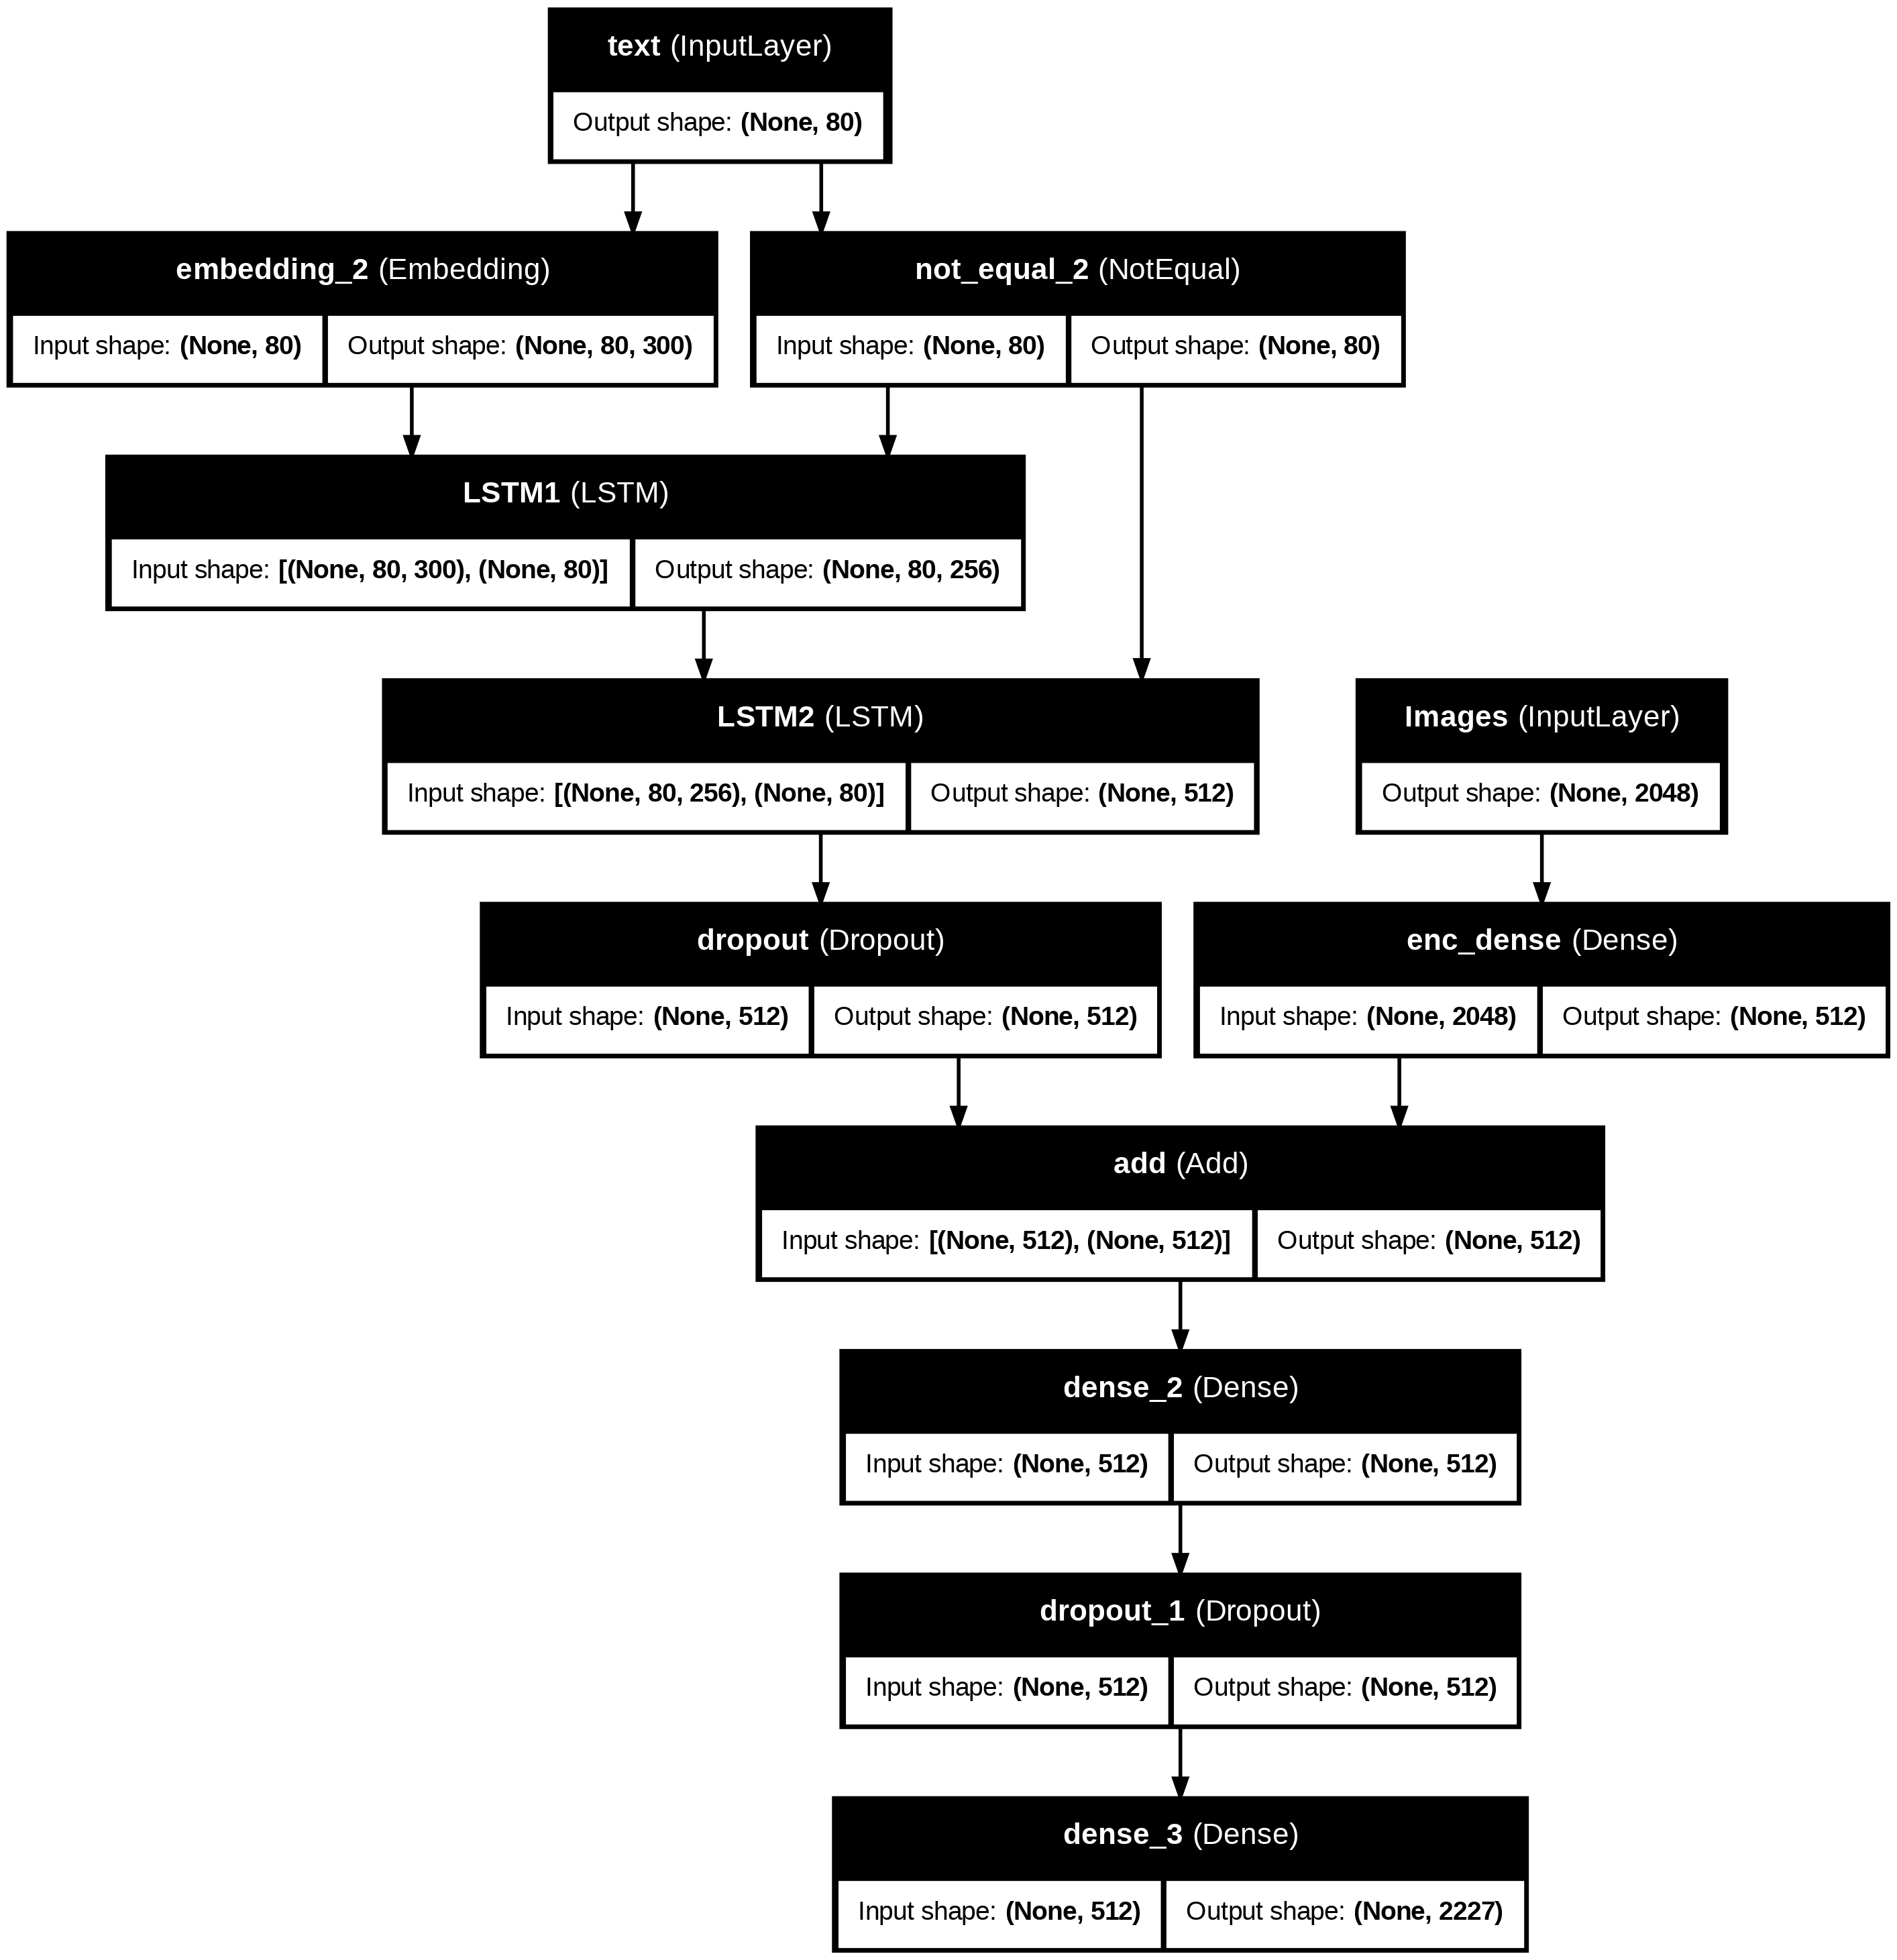

In [ ]:
tf.keras.utils.plot_model(encoder_decoder,show_shapes=True,show_layer_names=True,to_file="model1.png")

In [ ]:

batch_size=20

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_features,train_report))
train_dataset = train_dataset.shuffle(500).batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((test_features,test_report))
test_dataset = test_dataset.shuffle(500).batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [ ]:
for element in train_dataset:
  pass
print(element)


(<tf.Tensor: shape=(20, 1, 2048), dtype=float32, numpy=
array([[[5.3128647e-04, 1.1323490e-03, 4.4659618e-03, ...,
         7.7698952e-01, 8.1857181e-01, 6.4156729e-01]],

       [[5.1167590e-04, 1.6198166e-03, 2.5639054e-03, ...,
         8.0587333e-01, 8.6839974e-01, 6.5738165e-01]],

       [[2.4081141e-04, 1.8616802e-03, 2.8945387e-03, ...,
         8.0237532e-01, 8.4914124e-01, 6.5925938e-01]],

       ...,

       [[3.4729179e-05, 2.1750284e-03, 2.4145937e-03, ...,
         7.8851169e-01, 8.1913787e-01, 6.4533430e-01]],

       [[4.5130865e-04, 2.3248254e-03, 2.4599708e-03, ...,
         8.4527111e-01, 8.4607089e-01, 6.8941683e-01]],

       [[5.8154805e-05, 2.1839547e-03, 2.1744964e-03, ...,
         8.0291003e-01, 8.1517237e-01, 6.5711027e-01]]], dtype=float32)>, <tf.Tensor: shape=(20,), dtype=string, numpy=
array([b' Feeding tube passes below the left hemidiaphragm. Left subclavian central line tip is at the upper SVC. Shunt tubing courses along the anterior left hemithorax. T

In [ ]:
def load_data(images,reports_unpadded):
    #images=tf.reshape(image,shape=(image.shape[0],image.shape[-1]))
    imgs = []
    input_reports = []
    output_reports = []
    #print(len(images))
    for i in range(len(images)):
      sequence=[]
      for ele in reports_unpadded[i].split(" "):
        if ele in token.word_index.keys():
          sequence.append(token.word_index[ele])
      #  print(sequence)
      for j in range(1,len(sequence)):

            in_seq = sequence[:j]


            out_seq = sequence[j]

            out_seq = tf.keras.utils.to_categorical(out_seq, num_classes=vocab_size)

            imgs.append(images[i])

            input_reports.append(in_seq)

            output_reports.append(out_seq)

    return np.array(imgs), np.array(input_reports), np.array(output_reports)

In [ ]:
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=False, reduction='none')

def maskedLoss(y_true, y_pred):
    #getting mask value
    mask = tf.math.logical_not(tf.math.equal(y_true, 0))

    #calculating the loss
    loss_ = loss_function(y_true, y_pred)

    #converting mask dtype to loss_ dtype
    mask = tf.cast(mask, dtype=loss_.dtype)

    #applying the mask to loss
    loss_ = loss_*mask

    #getting mean over all the values
    loss_ = tf.reduce_mean(loss_)
    return loss_

In [ ]:

encoder_decoder.compile(optimizer="Adam", loss = maskedLoss)

In [ ]:

import datetime
import time


In [ ]:
train_features=tf.reshape(train_features,shape=(train_features.shape[0],train_features.shape[-1]))
test_features=tf.reshape(test_features,shape=(test_features.shape[0],test_features.shape[-1]))
train_features.shape

TensorShape([3080, 2048])

In [ ]:
train_loss_list = []
test_loss_list=[]

for epoch in range(20):
    print('EPOCH : ',epoch+1)
    start = time.time()
    batch_loss_train = 0
    batch_loss_test = 0

    for img, report in train_dataset:

        r1 = [word.decode('utf-8') for word in np.array(report)] # convert the tensor to array and then decode it

        #for each set of elements in dataset prepare the data using load_data function
        img_input, rep_input, output_word = load_data(img.numpy(), r1)
        #padd the input so as to feed into the model
        rep_input = tf.keras.preprocessing.sequence.pad_sequences(rep_input, maxlen=80, padding='post')
        img_input=tf.reshape(img_input,shape=(img_input.shape[0],img_input.shape[-1]))

        loss = encoder_decoder.train_on_batch([img_input, rep_input], output_word)

        batch_loss_train += loss

    train_loss = batch_loss_train/(len(train_report)//20)



    for img, report in test_dataset:

        r1 = [word.decode('utf-8') for word in np.array(report)]
        img_input, rep_input, output_word = load_data(img.numpy(), r1)
        rep_input = tf.keras.preprocessing.sequence.pad_sequences(rep_input, maxlen=80, padding='post')
        img_input=tf.reshape(img_input,shape=(img_input.shape[0],img_input.shape[-1]))
        loss = encoder_decoder.test_on_batch([img_input, rep_input], output_word)
        batch_loss_test += loss

    test_loss = batch_loss_test/(len(test_report)//20)


    train_loss_list.append(train_loss)

    test_loss_list.append(test_loss)

    print('Training Loss: {},  Val Loss: {}'.format(train_loss, test_loss))
    print('Time Taken for this Epoch : {} sec'.format(time.time()-start))
encoder_decoder.save_weights('encoder_decoder_epoch_'+ str(epoch+1) + '.h5')

Bidirectional GRU Beam

In [ ]:
k=190
print(test_features[k])
one=test.iloc[k]["image1"]
two=test.iloc[k]["image2"]
print(image_feature_extraction(one,two))


In [ ]:
print(train_features.shape)
print(test_features.shape)

In [ ]:
train_report=["<sos> "+text+" <eos>" for text in train["report"].values]
train_report_in=["<sos> "+text for text in train["report"].values]
train_report_out=[text+" <eos>" for text in train["report"].values]

test_report=["<sos> " +text+" <eos>" for text in test["report"].values]
test_report_in=["<sos> " +text for text in test["report"].values]
test_report_out=[text+" <eos>" for text in test["report"].values]

In [ ]:
print(train_report_in[0])
print("*"*100)
print(train_report_out[0])


In [ ]:
bs=10
max_len=80

In [ ]:
token=tf.keras.preprocessing.text.Tokenizer(filters='' )

token.fit_on_texts(train_report)
vocab_size=len(token.word_index)+1

seq=token.texts_to_sequences(train_report_in)
train_padded_inp=tf.keras.preprocessing.sequence.pad_sequences(seq,maxlen=max_len,padding="post")


seq=token.texts_to_sequences(train_report_out)
train_padded_out=tf.keras.preprocessing.sequence.pad_sequences(seq,maxlen=max_len,padding="post")

seq=token.texts_to_sequences(test_report_in)
test_padded_inp=tf.keras.preprocessing.sequence.pad_sequences(seq,maxlen=max_len,padding="post")


seq=token.texts_to_sequences(test_report_out)
test_padded_out=tf.keras.preprocessing.sequence.pad_sequences(seq,maxlen=max_len,padding="post")

In [ ]:
embeddings_index=dict()
f = open('glove.6B.300d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print("Done")
# create a weight matrix for words in training docs

embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tqdm(token.word_index.items()):
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [ ]:
input_img=Input(shape=(98,1024),name="image_fetaures")
input_txt=Input(shape=(max_len),name="text_input")

#encoder model
en_out=Dense(enc_units,activation="relu",name="encoder_dense")(input_img)
enc_out=tf.keras.layers.Dropout(0.5)(en_out)

state1= Input(shape=(bs,enc_units),name="state1")
state2= Input(shape=(bs,enc_units),name="state2")
state_h=tf.keras.layers.Add()([state1,state2])
#decoder model with attention

emb_out=tf.keras.layers.Embedding(vocab_size,output_dim=300,input_length=max_len,mask_zero=True,trainable=False,weights=[embedding_matrix])(input_txt)
weights=tf.keras.layers.AdditiveAttention()([state_h,en_out])
context_vector=tf.matmul(en_out,weights,transpose_b=True)[:,:,0]
context_vector=Dense(embedding_dim)(context_vector)
result=tf.concat([tf.expand_dims(context_vector, axis=1),emb_out],axis=1)
gru_out,state_1,state_2=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(dec_units,return_sequences=True, return_state=True,name="Bidirectional_GRU"))(result)
out=tf.keras.layers.Dense(vocab_size,name="decoder_final_dense")(gru_out)
en_de=Model(inputs=[input_txt,input_img,state1,state2],outputs=out)

keras.utils.plot_model(en_de)

In [ ]:
enc_units=64
embedding_dim=300
dec_units=64
att_units=64


In [ ]:
lass Encoder(tf.keras.Model):
  def __init__(self,units):
    super().__init__()
    self.units=units


  def build(self,input_shape):
    self.dense1=Dense(self.units,activation="relu",name="encoder_dense")
    self.maxpool=tf.keras.layers.Dropout(0.5)

  def call(self,input_):
    enc_out=self.maxpool(input_)
    enc_out=self.dense1(enc_out)

    return enc_out

  def initialize_states(self,batch_size):

      forward_h=tf.zeros((batch_size,self.units))
      back_h=tf.zeros((batch_size,self.units))
      return forward_h,back_h


In [ ]:
class Attention(tf.keras.layers.Layer):

  def __init__(self,att_units):

    super().__init__()

    self.att_units=att_units

  def build(self,input_shape):
    self.wa=tf.keras.layers.Dense(self.att_units)
    self.wb=tf.keras.layers.Dense(self.att_units)
    self.v=tf.keras.layers.Dense(1)


  def call(self,decoder_hidden_state,encoder_output):

    x=tf.expand_dims(decoder_hidden_state,1)

    # print(x.shape)
    # print(encoder_output.shape)

    alpha_dash=self.v(tf.nn.tanh(self.wa(encoder_output)+self.wb(x)))

    alphas=tf.nn.softmax(alpha_dash,1)

    # print("en",encoder_output.shape)
    # print("al",alphas.shape)

    context_vector=tf.matmul(encoder_output,alphas,transpose_a=True)[:,:,0]
    # context_vector = alphas*encoder_output
    # print("c",context_vector.shape)


    return (context_vector,alphas)




In [ ]:
class One_Step_Decoder(tf.keras.Model):
  def __init__(self,vocab_size, embedding_dim, input_length, dec_units ,att_units):

      # Initialize decoder embedding layer, LSTM and any other objects needed
    super().__init__()

    self.att_units=att_units
    self.vocab_size=vocab_size
    self.embedding_dim=embedding_dim
    self.input_length=input_length

    self.dec_units=dec_units
    self.attention=Attention(self.att_units)
  #def build(self,inp_shape):
    self.embedding=tf.keras.layers.Embedding(self.vocab_size,output_dim=self.embedding_dim,
                                             input_length=self.input_length,mask_zero=True,trainable=False,weights=[embedding_matrix])

    self.gru= tf.keras.layers.Bidirectional(tf.keras.layers.GRU(self.dec_units,return_sequences=True, return_state=True))
    self.dense=tf.keras.layers.Dense(self.vocab_size,name="decoder_final_dense")
    self.dense_2=tf.keras.layers.Dense(self.embedding_dim,name="decoder_dense2")

  def call(self,input_to_decoder, encoder_output, for_h,bac_h):

    embed=self.embedding(input_to_decoder)
    state_h=tf.keras.layers.Add()([for_h,bac_h])


    context_vector,alpha=self.attention(state_h,encoder_output)
    context_vector=self.dense_2(context_vector)

    result=tf.concat([tf.expand_dims(context_vector, axis=1),embed],axis=-1)


    output,forward_h,back_h=self.gru(result,initial_state=[for_h,bac_h])
    out=tf.reshape(output,(-1,output.shape[-1]))

    out=tf.keras.layers.Dropout(0.5)(out)

    dense_op=self.dense(out)

    return dense_op,forward_h,back_h,alpha

In [ ]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, output_length, dec_units,att_units):
      super().__init__()
      #Intialize necessary variables and create an object from the class onestepdecoder
      self.onestep=One_Step_Decoder(vocab_size, embedding_dim, output_length, dec_units,att_units)



    def call(self, input_to_decoder,encoder_output,state_1,state_2):

        #Initialize an empty Tensor array, that will store the outputs at each and every time step
        #Create a tensor array as shown in the reference notebook

        #Iterate till the length of the decoder input
            # Call onestepdecoder for each token in decoder_input
            # Store the output in tensorarray
        # Return the tensor array

        all_outputs=tf.TensorArray(tf.float32,input_to_decoder.shape[1],name="output_array")
        for step in range(input_to_decoder.shape[1]):
          output,state_1,state_2,alpha=self.onestep(input_to_decoder[:,step:step+1],encoder_output,state_1,state_2)

          all_outputs=all_outputs.write(step,output)
        all_outputs=tf.transpose(all_outputs.stack(),[1,0,2])

        return all_outputs


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
class encoder_decoder(tf.keras.Model):
  def __init__(self,enc_units,embedding_dim,vocab_size,output_length,dec_units,att_units,batch_size):
        super().__init__()


        self.batch_size=batch_size
        self.encoder =Encoder(enc_units)
        self.decoder=Decoder(vocab_size,embedding_dim,output_length,dec_units,att_units)



  def call(self, data):
        features,report  = data[0], data[1]

        encoder_output= self.encoder(features)
        state_h,back_h=self.encoder.initialize_states(self.batch_size)

        output= self.decoder(report, encoder_output,state_h,back_h)

        return output




In [ ]:
model  = encoder_decoder(enc_units,embedding_dim,vocab_size,max_len,dec_units,att_units,bs)


In [ ]:

optimizer = tf.keras.optimizers.Adam()

loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='auto')

def custom_lossfunction(y_true, y_pred):
    #getting mask value
    mask = tf.math.logical_not(tf.math.equal(y_true, 0))

    #calculating the loss
    loss_ = loss_function(y_true, y_pred)

    #converting mask dtype to loss_ dtype
    mask = tf.cast(mask, dtype=loss_.dtype)

    #applying the mask to loss
    loss_ = loss_*mask

    #getting mean over all the values
    loss_ = tf.reduce_mean(loss_)
    return loss_

In [ ]:
model.compile(optimizer=optimizer,loss=custom_lossfunction)

In [ ]:
red_lr=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",factor=0.2,patience=2, min_lr=0.0001)
ckpt=tf.keras.callbacks.ModelCheckpoint("model2wts/ckpt",monitor='val_loss', verbose=0, save_best_only=True,save_weights_only=False, mode='auto')

In [ ]:
model.fit([train_features[:3050],train_padded_inp[:3050]],train_padded_out[:3050],validation_data=([test_features[:760],test_padded_inp[:760]],test_padded_out[:760]),
          batch_size=bs,epochs=15,callbacks=[red_lr,ckpt])

In [ ]:
model.load_weights("model2wts/bidir_fit_15_b")

In [ ]:
def take_second(elem):
    return elem[1]

In [ ]:
import time

def beam_search(image1,image2, beam_index):

    hidden_state =  tf.zeros((1, enc_units))
    hidden_state2 =  tf.zeros((1, enc_units))
    image_features=image_feature_extraction(image1,image2)

    encoder_out = model.layers[0](image_features)

    start_token = [token.word_index["<sos>"]]
    dec_word = [[start_token, 0.0]]
    while len(dec_word[0][0]) < max_len:
        temp = []
        for word in dec_word:

            predict, hidden_state,hidden_state2,alpha = model.layers[1].onestep(tf.expand_dims([word[0][-1]],1), encoder_out, hidden_state,hidden_state2)


            word_predict = np.argsort(predict[0])[-beam_index:]
            for i in word_predict:

                next_word, probab = word[0][:], word[1]
                next_word.append(i)
                probab += predict[0][i]
                temp.append([next_word, probab.numpy()])
        dec_word = temp
        # Sorting according to the probabilities scores


        dec_word = sorted(dec_word, key=take_second)

        # Getting the top words
        dec_word = dec_word[-beam_index:]


    final = dec_word[-1]

    report =final[0]
    score = final[1]
    temp = []

    for word in report:
      if word!=0:
        if word != token.word_index['<eos>']:
            temp.append(token.index_word[word])
        else:
            break

    rep = ' '.join(e for e in temp)

    return rep, score

In [ ]:
import random
start=time.time()
i=random.sample(range(test.shape[0]),1)[0]
img1=test.iloc[i]["image1"]
img2=test.iloc[i]["image2"]
  #show th corresponding x-ray images
i1=cv2.imread(img1)
i2=cv2.imread(img2)
plt.figure(figsize=(10,6))
plt.subplot(131)
plt.title("image1")
plt.imshow(i1)
plt.subplot(132)
plt.title("image2")
plt.imshow(i2)
plt.show()
  #printing the actual and generated results

result,score=beam_search(img1,img2,3)
actual=test_report[i]

print("ACTUAL REPORT: ",actual)
print("GENERATED REPORT: ",result)
end=time.time()
print("BLEU SCORE IS: ",bleu.sentence_bleu(actual,result))

print("time required for the evaluation is ",end-start)


In [ ]:
import random
start=time.time()
i=random.sample(range(test.shape[0]),1)[0]
img1=test.iloc[i]["image1"]
img2=test.iloc[i]["image2"]
  #show th corresponding x-ray images
i1=cv2.imread(img1)
i2=cv2.imread(img2)
plt.figure(figsize=(10,6))
plt.subplot(131)
plt.title("image1")
plt.imshow(i1)
plt.subplot(132)
plt.title("image2")
plt.imshow(i2)
plt.show()
  #printing the actual and generated results

result,score=beam_search(img1,img2,3)
actual=test_report[i]

print("ACTUAL REPORT: ",actual)
print("GENERATED REPORT: ",result)
end=time.time()
print("BLEU SCORE IS: ",bleu.sentence_bleu(actual,result))

print("time required for the evaluation is ",end-start)


In [ ]:
index=range(0,test.shape[0])
bl=0
start1=time.time()
for i in tqdm(index):
  img1=test.iloc[i]["image1"]
  img2=test.iloc[i]["image2"]
  result,sore=beam_search(img1,img2,3)
  actual=test_report[i]
  bl+=bleu.sentence_bleu(actual,result)
end1=time.time()
print("\n")
print("average bleu score on the test data is ",bl/test.shape[0])